# setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from multiprocessing import Pool
import multiprocessing
import csv
import json
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed


# OTU info 97 (reference otus)

In [6]:
file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/otus.97.allinfo"
# Read and display the first 20 lines for inspection
with open(file_path, "r") as file:
    for i in range(50):
        print(file.readline().strip())  

MAPv3;90_16;96_20650;97_42874	1					ATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCATTTTAGATGAAGTTTTCGGATGGAATTTGAAATGACTGAGTGGCGGACGGGTGAGTAACGCGTGGGCAACCTGCCCTGTACAGGGGGACAACAGTTGGAAACGACTGCTAATACCGCATAAGCGCACAGTGCCGCATGGCACGGTGTGAAAAACTCCGGTGGTACAGGATGGGCCCGCGTCTGATTAGGTAGTTGGTGAGGTAATGGCCCACCAGGCCGACGATCAGTAGCCGACCTGAGAGGGTGACCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAGCGAAGAAGTATTTCGGTATGTAAAGCTCTATCAGCAAGGAAGAAAATGACGGTACCTGACTAAGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGAAAAGCAAGTCTGATGTGAAAGGCATGGGCTCAGCCCGTGGACTGCATTGGAAACTGTTTTTCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCGGTAAACGATGAATACTAGGTGTTGGGTAGCAAAGCTATTCGGTGCCGCAGCAAACGCAATAAGTATTCCACCTGGGGAGTACGTTCGCAAGAATGAAACTCAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAAGTCTTGACATCCCTCTG

In [9]:
otu_data = []
with open(file_path, "r") as file:
    for line in file:
        parts = line.strip().split("\t")  # Split by tab
        
        if len(parts) < 3:
            continue  # Skip lines that don't have enough information

        # Extract key information with index validation
        otu_id_full = parts[0]  # Full OTU Identifier (e.g., "MAPv3;90_xxx;96_xxx;...")
        otu_id = otu_id_full.replace("MAPv3;", "")  # Remove "MAPv3;"
        
        count = parts[1] if len(parts) > 1 else None  # Count or missing        
		# save the reads 
        read = parts[6] if len(parts) > 8 else None
        # Extract taxonomy-related information
        taxonomy = parts[8] if len(parts) > 8 else None  # d__Bacteria...
        alternative_taxonomy = parts[14] if len(parts) > 14 else None  # More detailed classification
        
        ncbi_ref_id = parts[7] if len(parts) > 7 else None  # AY520230:1..1740
        ref_genome = parts[10] if len(parts) > 10 else None  # RS_GCF_000508925.1~NZ_BAHT02000264.1
        accession_id = parts[16] if len(parts) > 16 else None  # AB018123:1..1765
        
        try:
            confidence_score = float(parts[12]) if len(parts) > 12 and parts[12].replace('.', '', 1).isdigit() else None
        except ValueError:
            confidence_score = None  # Assign None if conversion fails
        
        try:
            read_count = int(parts[13]) if len(parts) > 13 and parts[13].isdigit() else None
        except ValueError:
            read_count = None  # Assign None if conversion fails
        
        try:
            sec_confidence_score = float(parts[18]) if len(parts) > 18 and parts[18].replace('.', '', 1).isdigit() else None
        except ValueError:
            sec_confidence_score = None
        
        try:
            sec_read_count = int(parts[19]) if len(parts) > 19 and parts[19].isdigit() else None
        except ValueError:
            sec_read_count = None
        
        # Store in list
        otu_data.append({
            "otu_id": otu_id,  # Store cleaned OTU ID
            "count": count,
            "read": read,
            "taxonomy": taxonomy,
            "alt_taxonomy": alternative_taxonomy,
            "ref_id": ncbi_ref_id,
            "ref_genome": ref_genome,
            "accession_id": accession_id,
            "confidence_score": confidence_score,
            "read_count": read_count,
            "sec_confidence_score": sec_confidence_score,
            "sec_read_count": sec_read_count
        })  
        
df_otus = pd.DataFrame(otu_data)

display(df_otus.head(20))
output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/processed_otus_info_97.csv"
df_otus.to_csv(output_path, index=False)

print(f"Processed OTU data saved to: {output_path}")

,otu_id,count,read,taxonomy,alt_taxonomy,ref_id,ref_genome,accession_id,confidence_score,read_count,sec_confidence_score,sec_read_count
0,90_16;96_20650;97_42874,1,ATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCAT...,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,Bacteria;Firmicutes;Clostridia;Clostridiales;L...,KF075129:1..1352,GB_GCA_900447015.1~UAVW01000001.1,NZ_GG657593:2768..4308,0.936391,1175,0.935651,1166
1,90_382;96_19662;97_24410,2,GAGTTTGATCATGGCTCAGAATGAACGCTGGCGGCGTGGTTAAGAC...,d__Bacteria,Bacteria,HQ727656:1..1532,RS_GCF_001703865.1~NZ_MBLR01000173.1,NZ_GL397077:27..1343,0.248031,93,0.858921,163
2,90_172;96_1876;97_40272,1,GCGGGGTGCATACACATGCAGTCGACGATGAAGATATTTAGATTCC...,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,Bacteria;Firmicutes;Tissierellia;Tissierellale...,AY995238:1..1319,RS_GCF_000159095.1~NZ_GG666301.1,LC036320:1..1487,0.971669,1207,0.971669,1207
3,90_18938;96_79042;97_101874,1,TTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTAAGCCATG...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Eukaryota;;Ichthyosporea,AY894302:1..1867,RS_GCF_002020285.1~NZ_MPQC01000044.1,Y19155:1..1797,0.885204,287,0.800570,196
4,90_1892;96_60976;97_78973,1,GCAGTCGAGCGCCCTCTTCGGGGGGAGCGGCGGACGGGTGAGTAAC...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,JN825342:1..1334,RS_GCF_000273405.1~NZ_AKVW01000001.1,NZ_FTOM01000018:229..1699,0.916290,1097,0.924528,1115
5,90_17477;96_14804;97_18077,1,GAGTTTGATCCTGGCTCAGGATGAACGCTAGCGGCAGGCCTAATAC...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria;Bacteroidetes;Cytophagia;Cytophagales...,JN579960:1..1610,RS_GCF_900177665.1~NZ_FXAW01000008.1,NZ_FXAW01000008:260584..262111,0.899533,322,0.899533,322
6,90_7210;96_31636;97_40024,1,CTCAGGATGAACGCTAGCGGCAGGCTTAATACATGCAAGTCGAGGG...,d__Bacteria;p__Bacteroidota;c__Bacteroidia,Bacteria;Proteobacteria;Betaproteobacteria,JQ684172:1..1455,RS_GCF_002954265.1~NZ_PPSL01000017.1,NZ_CP019240:807501..809045,0.818806,914,0.820209,880
7,90_17;96_1095;97_10583,1,GAGCTTGCTCTTGTGGGTGGCGAGTGGCGGACGGGTGAGGAATGCG...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria;Proteobacteria;Gammaproteobacteria;Xa...,JQ855546:1..1289,RS_GCF_000768355.1~NZ_AVPU01000067.1,AB682404:1..1470,0.972050,1211,0.972050,1211
8,90_20463;96_79800;97_102793,1,CTCAAAGATTAAGCCATGCATGTCTAAGTACATACCGTATTAAGGT...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Eukaryota;Ascomycota;Saccharomycetes,JQ000207:1..1740,GB_GCA_003248545.1~QFOR01000139.1,AB013538:1..1739,0.841004,158,0.814516,144
9,90_2588;96_11470;97_13885,4,GAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCATGCTTAACAC...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria;Proteobacteria;Alphaproteobacteria,HM768683:1..1354,RS_GCF_000965005.1~NZ_LAOI01000001.1,NC_009719:1901249..1902744,0.858579,1060,0.864702,1066


Processed OTU data saved to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/processed_otus_info_97.csv


In [ ]:
df_otus.shape 

(111870, 12)

# loading samples 

In [12]:
file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"

with open(file_path, "r") as file:
    lines = file.readlines()

# Process the first 20 lines for readability
for i in range(min(20, len(lines))):
    line = lines[i].strip()
    
    if line.startswith(">"):  
        # Sample header (e.g., ">SRR2459896.SRS1074972")
        print(f"\nSample: {line[1:]}\n" + "-"*50)
    else:
        # Split OTU abundance data (assuming space-separated values)
        otu_data = line.split()
        formatted_otu = [entry.replace("_", ":") for entry in otu_data]  # Replace "_" with ":" for clarity
        print(", ".join(formatted_otu))  # Print formatted OTU data



Sample: SRR2459896.SRS1074972	66481	23845	497
--------------------------------------------------
90:246;96:8626;97:10374, 4920
90:15828;96:741;97:864, 4546
90:2004;96:8630;97:10378, 3210
90:3;96:530;97:6036, 2516
90:1349;96:5812;97:6987, 1160
90:5;96:8632;97:10380, 779
90:207;96:8631;97:10379, 687
90:1043;96:25689;97:36142, 536
90:34;96:226;97:248, 417
90:196;96:13782;97:18927, 308
90:17;96:14843;97:18125, 245
90:86;96:866;97:1014, 197
90:1209;96:5340;97:6448, 160
90:6204;96:27515;97:34620, 152
90:196;96:2987;97:3672, 145
90:16009;96:67222;97:87325, 144
90:2004;96:19701;97:24456, 138
90:15838;96:2876;97:3535, 131
90:34;96:1253;97:32225, 119


In [ ]:
file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"

with open(file_path, "r") as file:
    lines = file.readlines()



Could not extract read count from sample name.

Sample name: SRR2459896.SRS1074972	66481	23845	497
Extracted number of reads: None
Total OTU abundance sum: 0


In [14]:
file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"

with open(file_path, "r") as file:
    lines = file.readlines()

sample_id = None
expected_reads = None
abundance_sum = 0
processing_sample = False

for line in lines:
    line = line.strip()
    
    if line.startswith(">"):
        if processing_sample:
            break  # We already processed the first sample, stop here

        # Parse sample ID and number of reads
        parts = line[1:].split("\t")
        sample_id = parts[0]
        expected_reads = int(parts[1])
        processing_sample = True
    elif processing_sample:
        try:
            _, abundance = line.rsplit("\t", 1)  # OTU info is ignored here
            abundance_sum += int(abundance)
        except ValueError:
            print(f"Skipping malformed line: {line}")

# Final comparison
print(f"Sample ID: {sample_id}")
print(f"Expected number of reads: {expected_reads}")
print(f"Sum of OTU abundances: {abundance_sum}")

if abundance_sum == expected_reads:
    print("✅ Abundances match the number of reads.")
else:
    print("❌ Mismatch between abundance sum and reported reads.")


Sample ID: SRR2459896.SRS1074972
Expected number of reads: 66481
Sum of OTU abundances: 23524
❌ Mismatch between abundance sum and reported reads.


In [15]:
23524/66481

0.3538454596049999

In [16]:
from multiprocessing import Pool


In [17]:
file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"

def count_samples_in_chunk(chunk):
    """Count the number of sample headers '>' in a chunk of the file."""
    return sum(1 for line in chunk if line.startswith(">"))

def count_samples_parallel(file_path, num_workers=4, chunk_size=10**6):
    """Count the number of samples in a large file using parallel processing."""
    total_samples = 0
    with open(file_path, "r") as file:
        with Pool(processes=num_workers) as pool:
            while True:
                chunk = file.readlines(chunk_size)  # Read a chunk of lines
                if not chunk:
                    break
                results = pool.map(count_samples_in_chunk, [chunk])
                total_samples += sum(results)
    
    return total_samples

# Run the counting process
num_samples = count_samples_parallel(file_path, num_workers=20) 
print(f"Total number of samples: {num_samples}")

Total number of samples: 1836255


In [18]:
import os
from concurrent.futures import ProcessPoolExecutor

def count_headers_in_chunk(lines):
    return sum(1 for line in lines if line.startswith(">"))

def chunkify(lst, n):
    # Split list into n nearly equal chunks
    k, m = divmod(len(lst), n)
    return (lst[i*k + min(i, m):(i+1)*k + min(i+1, m)] for i in range(n))

file_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"
num_workers = os.cpu_count()  # Number of CPU cores

# Load all lines into RAM
with open(file_path, "r") as f:
    all_lines = f.readlines()

# Split lines across workers
chunks = list(chunkify(all_lines, num_workers))

# Run in parallel
with ProcessPoolExecutor(max_workers=num_workers) as executor:
    counts = list(executor.map(count_headers_in_chunk, chunks))

total_samples = sum(counts)
print(f"Total number of samples: {total_samples}")

Total number of samples: 1836255


# Save as a dictionary to easy reading 

In [20]:
import json
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed


In [19]:
def parse_sample(sample_lines):
    """
    Parse lines for one sample (header + taxonomies).
    Returns (sample_id, {taxonomy_path: abundance, ...}).
    """
    header_line = sample_lines[0].lstrip('>')
    fields = header_line.split()
    sample_id = fields[0]  # e.g. "SRR2459896.SRS1074972"

    tax_dict = {}
    for line in sample_lines[1:]:
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        taxonomy_path = parts[0]
        abundance = int(parts[1])
        tax_dict[taxonomy_path] = abundance

    return sample_id, tax_dict

def stream_samples(file_path):
    """
    Generator that yields a list of lines for each sample.
    Each sample starts with a line beginning '>' and continues
    until the next '>' or EOF.
    """
    with open(file_path, 'r') as f:
        current_sample = []
        for line in f:
            if line.startswith('>'):
                # If we have a prior sample collected, yield it first
                if current_sample:
                    yield current_sample
                # start a new sample
                current_sample = [line.strip()]
            else:
                current_sample.append(line.strip())
        # yield the last sample if it exists
        if current_sample:
            yield current_sample

def main(input_path, output_path, num_workers=4, print_interval=10_000):
    """
    Reads the big file, parses samples in parallel, and writes out a
    single JSON object of the form:

    {
      "sample_id_1": { ... },
      "sample_id_2": { ... },
      ...
    }

    without ever holding the entire data in memory.
    """
    with ProcessPoolExecutor(max_workers=num_workers) as executor, open(output_path, 'w') as out:
        futures = []
        
        # 1) Submit parsing tasks (one per sample)
        for sample_lines in stream_samples(input_path):
            fut = executor.submit(parse_sample, sample_lines)
            futures.append(fut)
        
        # 2) Start writing the JSON file
        out.write("{\n")
        
        first = True      # Track if this is the first sample we write
        processed_count = 0
        
        # 3) As each parse future finishes, write its data immediately
        for fut in as_completed(futures):
            sample_id, tax_dict = fut.result()
            
            # If it's not our first entry, we need a comma+newline before writing the next key
            if not first:
                out.write(",\n")
            first = False
            
            # Write "sample_id": { ... } for each sample
            # e.g.  "SRR2459896.SRS1074972": {"90_15828;96_741;...": 4478, ...}
            out.write(f'"{sample_id}": {json.dumps(tax_dict)}')
            
            # Update progress
            processed_count += 1
            if processed_count % print_interval == 0:
                print(f"Processed {processed_count} samples so far...")
        
        # 4) Close the JSON object
        out.write("\n}\n")

In [21]:

samples_otu_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus.97.metag.minfilter"
output_json_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.json"
main(samples_otu_path, output_json_path, num_workers=35)

Processed 10000 samples so far...
Processed 20000 samples so far...
Processed 30000 samples so far...
Processed 40000 samples so far...
Processed 50000 samples so far...
Processed 60000 samples so far...
Processed 70000 samples so far...
Processed 80000 samples so far...
Processed 90000 samples so far...
Processed 100000 samples so far...
Processed 110000 samples so far...
Processed 120000 samples so far...
Processed 130000 samples so far...
Processed 140000 samples so far...
Processed 150000 samples so far...
Processed 160000 samples so far...
Processed 170000 samples so far...
Processed 180000 samples so far...
Processed 190000 samples so far...
Processed 200000 samples so far...
Processed 210000 samples so far...
Processed 220000 samples so far...
Processed 230000 samples so far...
Processed 240000 samples so far...
Processed 250000 samples so far...
Processed 260000 samples so far...
Processed 270000 samples so far...
Processed 280000 samples so far...
Processed 290000 samples so f

# Filrtering less than 3 reads OTUs

In [9]:
## first take out the OTUs with less than 5 read
# Input and output file paths
samples_OTUs_json_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.json"
filtered_output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.filtered-5-reads.json"

# Load the full dataset
with open(samples_OTUs_json_path, "r") as f:
    samples = json.load(f)

# Filter OTUs with abundance > 5
filtered_samples = {}
for sample_id, otu_dict in samples.items():
    filtered_otus = {otu: count for otu, count in otu_dict.items() if count > 3}
    if filtered_otus:  # Keep sample only if at least one OTU remains
        filtered_samples[sample_id] = filtered_otus

# Save filtered version
with open(filtered_output_path, "w") as f:
    json.dump(filtered_samples, f, indent=2)

print(f"Filtered dataset saved to:\n{filtered_output_path}")


Filtered dataset saved to:
/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.filtered-5-reads.json


In [10]:
filtered_output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.filtered-5-reads.json"

with open(filtered_output_path, "r") as f:
    data = json.load(f)


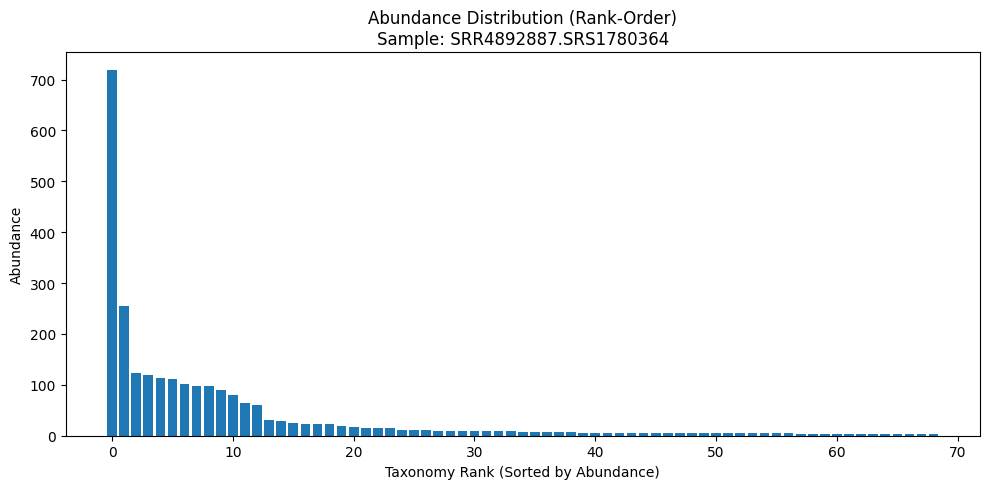

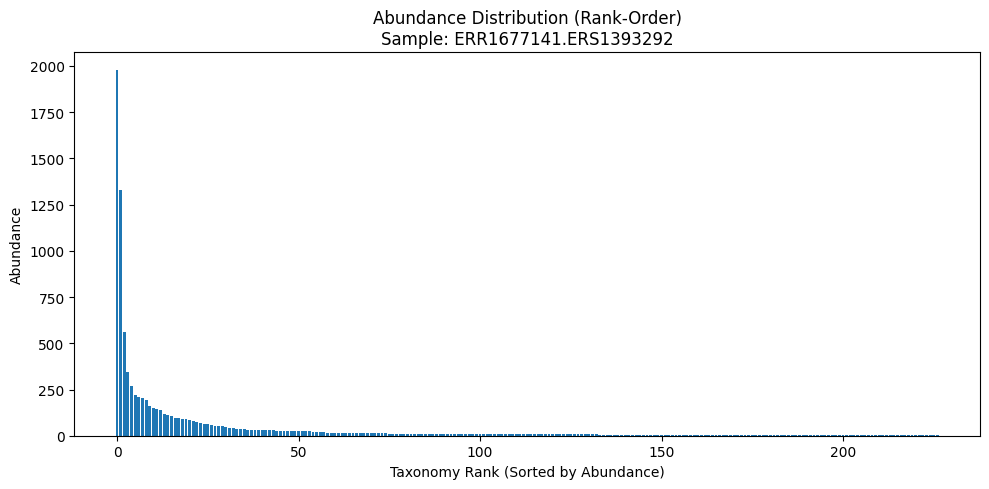

In [11]:
# Grab just the first two sample IDs
sample_ids = list(data.keys())[:2]

for sample_id in sample_ids:
    tax_dict = data[sample_id]

    # Extract and sort the abundance values (descending, for example)
    abundances = list(tax_dict.values())
    abundances.sort(reverse=True)

    # Optional: limit to top 50 if you have a huge number of taxonomies
    # abundances = abundances[:50]

    # Make a bar plot of these sorted abundance values
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(abundances)), abundances)
    plt.title(f"Abundance Distribution (Rank-Order)\nSample: {sample_id}")
    plt.xlabel("Taxonomy Rank (Sorted by Abundance)")
    plt.ylabel("Abundance")
    plt.tight_layout()
    plt.show()

95 th percentile of OTU counts per sample: 481.00


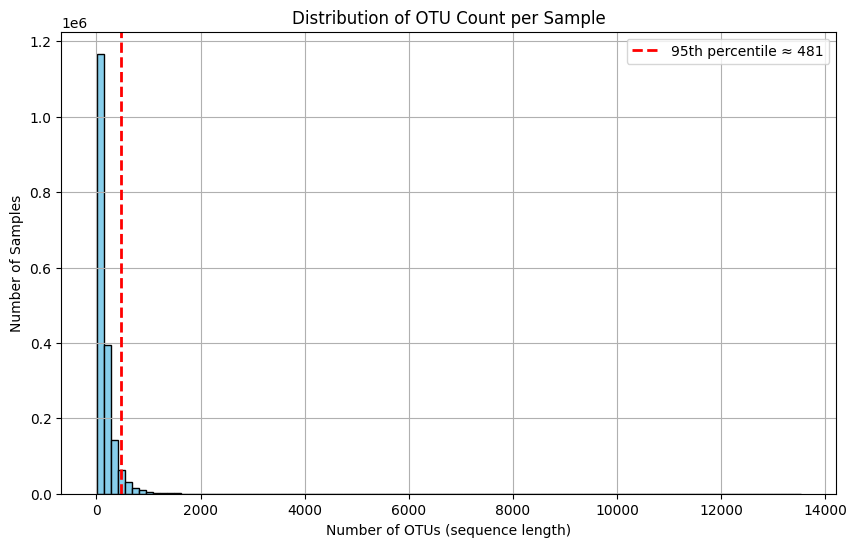

In [13]:
# Step 1: Get OTU counts per sample
otu_lengths = [len(otu_dict) for otu_dict in data.values()]
percentile_955 = np.percentile(otu_lengths, 95)
print(f"95 th percentile of OTU counts per sample: {percentile_955:.2f}")

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(otu_lengths, bins=100, color='skyblue', edgecolor='black')
plt.axvline(percentile_955, color='red', linestyle='dashed', linewidth=2,
            label=f'95th percentile ≈ {int(percentile_955)}')
plt.title("Distribution of OTU Count per Sample")
plt.xlabel("Number of OTUs (sequence length)")
plt.ylabel("Number of Samples")
plt.legend()
plt.grid(True)
plt.show()

# LLM imput array

In [15]:
# Parameters
filtered_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/samples-otus-97.filtered-5-reads.json"

# Load filtered sample dict
with open(filtered_path, "r") as f:
    data = json.load(f)


In [16]:
max_len = 481
pad_token = "<pad>"
# Initialize outputs
sequence_matrix = []
sample_ids = []

# Build sequence list for each sample
for sample_id, otu_dict in data.items():
    # Sort OTUs by abundance descending
    sorted_otus = sorted(otu_dict.items(), key=lambda x: -x[1])
    otu_names = [otu for otu, _ in sorted_otus]

    # Truncate or pad
    if len(otu_names) >= max_len:
        otu_seq = otu_names[:max_len]
    else:
        otu_seq = otu_names + [pad_token] * (max_len - len(otu_names))

    sequence_matrix.append(otu_seq)
    sample_ids.append(sample_id)

# Optional: save to disk
save_path_matrix = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/otus_sequences.json"
save_path_ids = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/sample_ids.json"

with open(save_path_matrix, "w") as f:
    json.dump(sequence_matrix, f)

with open(save_path_ids, "w") as f:
    json.dump(sample_ids, f)

print(f"Saved matrix shape: {len(sequence_matrix)} x {len(sequence_matrix[0])}")
print(f"Saved OTU sequences to: {save_path_matrix}")
print(f"Saved sample IDs to: {save_path_ids}")

Saved matrix shape: 1836250 x 481
Saved OTU sequences to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/otus_sequences.json
Saved sample IDs to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/sample_ids.json


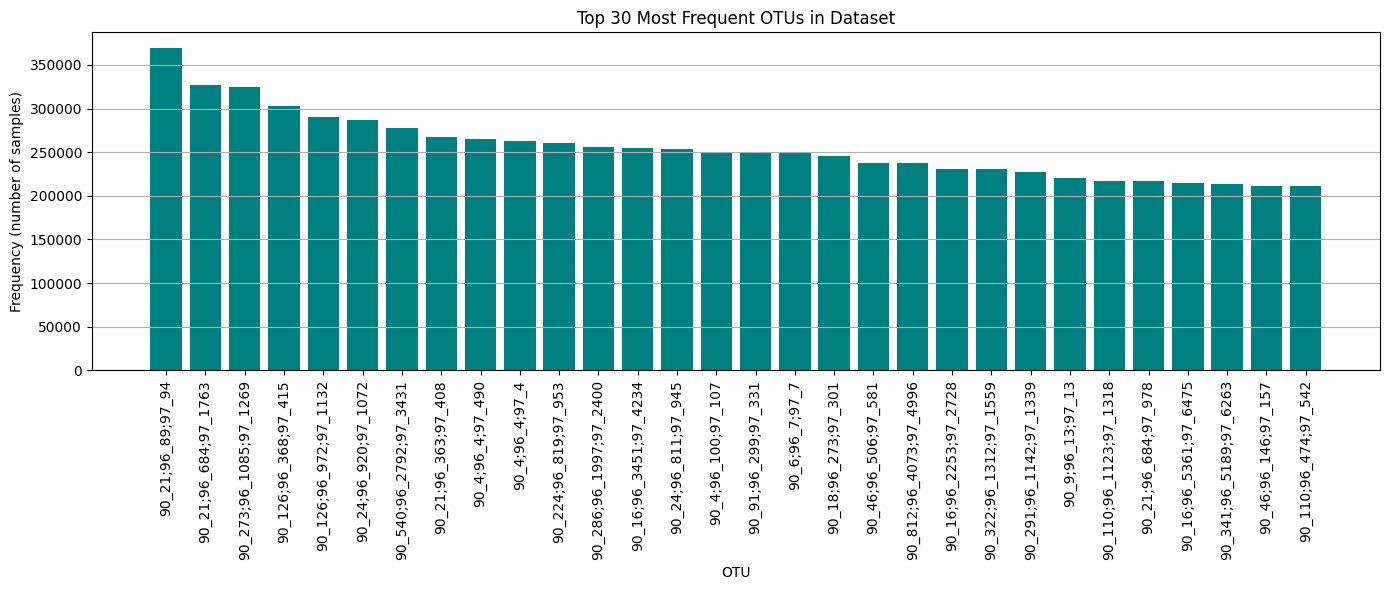

In [22]:
# Count OTU frequencies (excluding <pad>)
otu_counter = Counter()
for seq in sequence_matrix:
    for otu in seq:
        if otu != "<pad>":
            otu_counter[otu] += 1

# Get top N most common OTUs
top_n = 30
top_otus = otu_counter.most_common(top_n)

# Unpack for plotting
otus, counts = zip(*top_otus)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(range(len(otus)), counts, color='teal')
plt.xticks(range(len(otus)), otus, rotation=90)
plt.title(f"Top {top_n} Most Frequent OTUs in Dataset")
plt.xlabel("OTU")
plt.ylabel("Frequency (number of samples)")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

/tmp/ipykernel_2878305/1994762251.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


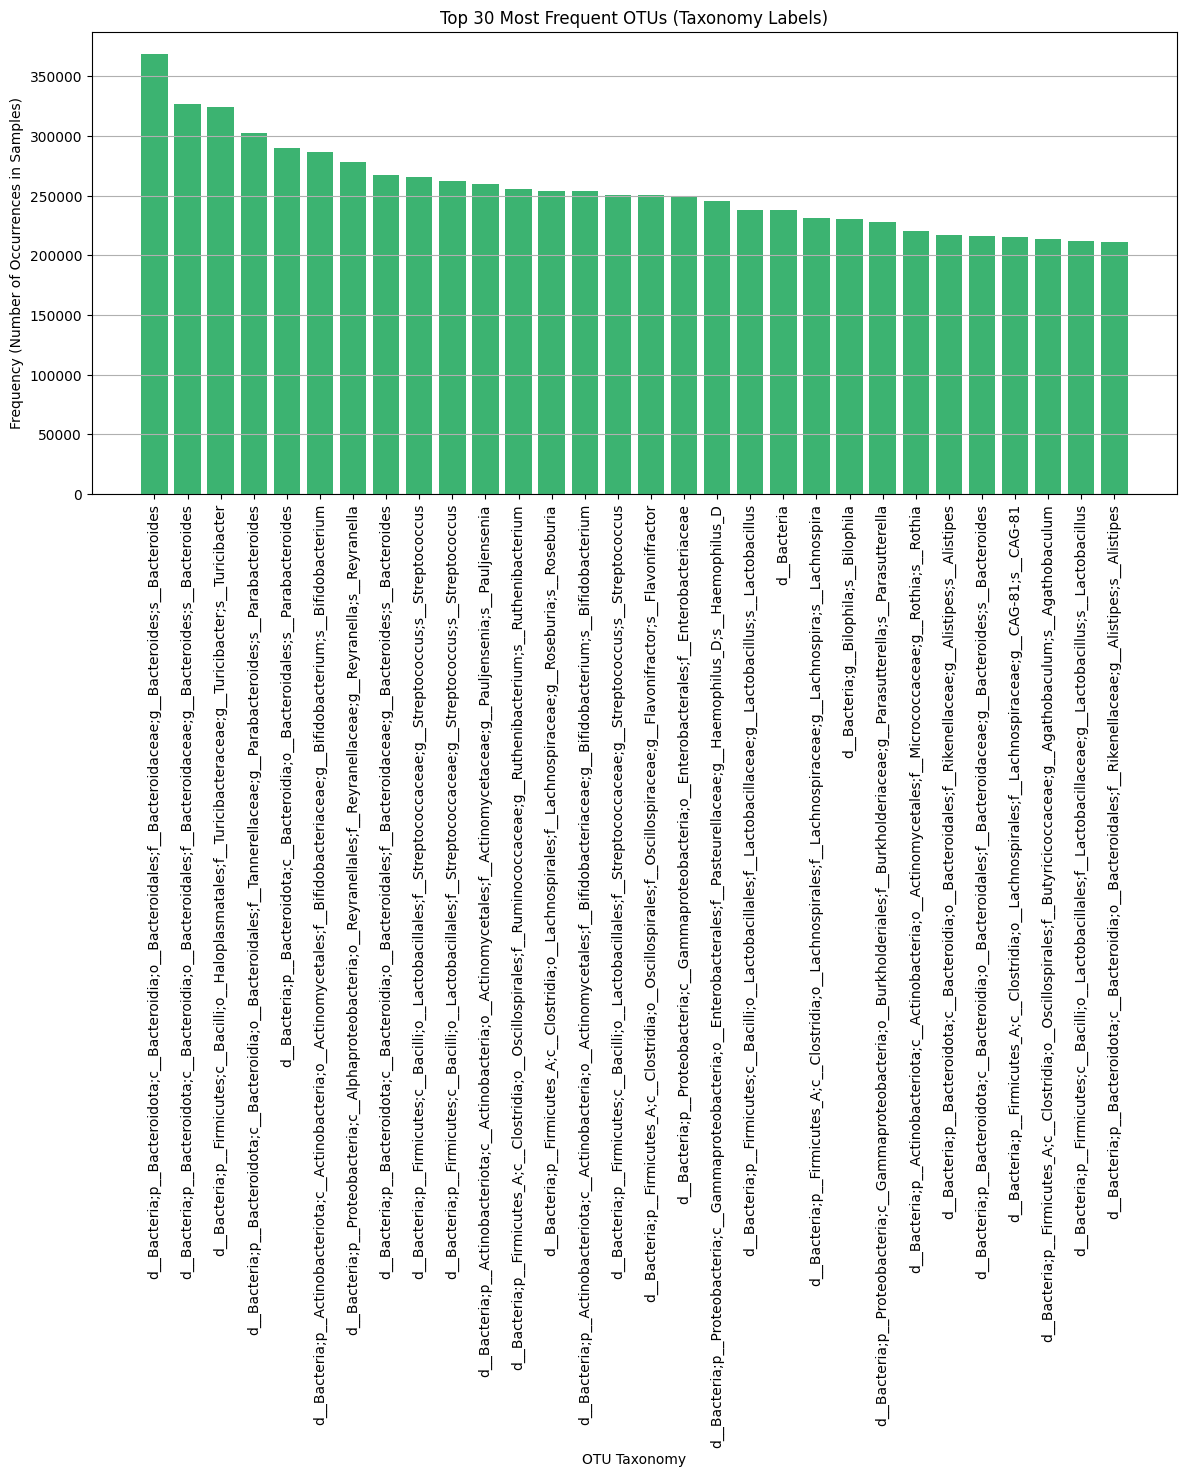

In [27]:

# Load OTU metadata
otu_info_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/processed_otus_info_97.csv"
df_otus = pd.read_csv(otu_info_path)
otu_to_taxonomy = dict(zip(df_otus["otu_id"], df_otus["taxonomy"]))

# Count OTU frequencies (no aggregation)
otu_counter = Counter()
for seq in sequence_matrix:
    for otu in seq:
        if otu != "<pad>":
            otu_counter[otu] += 1

# Get top N most common OTUs
top_n = 30
top_otus = otu_counter.most_common(top_n)

# Extract taxonomy labels for each OTU (fallback to OTU name if not found)
labels = [otu_to_taxonomy.get(otu, otu) for otu, _ in top_otus]
counts = [count for _, count in top_otus]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(range(top_n), counts, color='mediumseagreen')
plt.xticks(range(top_n), labels, rotation=90)
plt.title(f"Top {top_n} Most Frequent OTUs (Taxonomy Labels)")
plt.xlabel("OTU Taxonomy")
plt.ylabel("Frequency (Number of Occurrences in Samples)")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

/tmp/ipykernel_2878305/1650091937.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


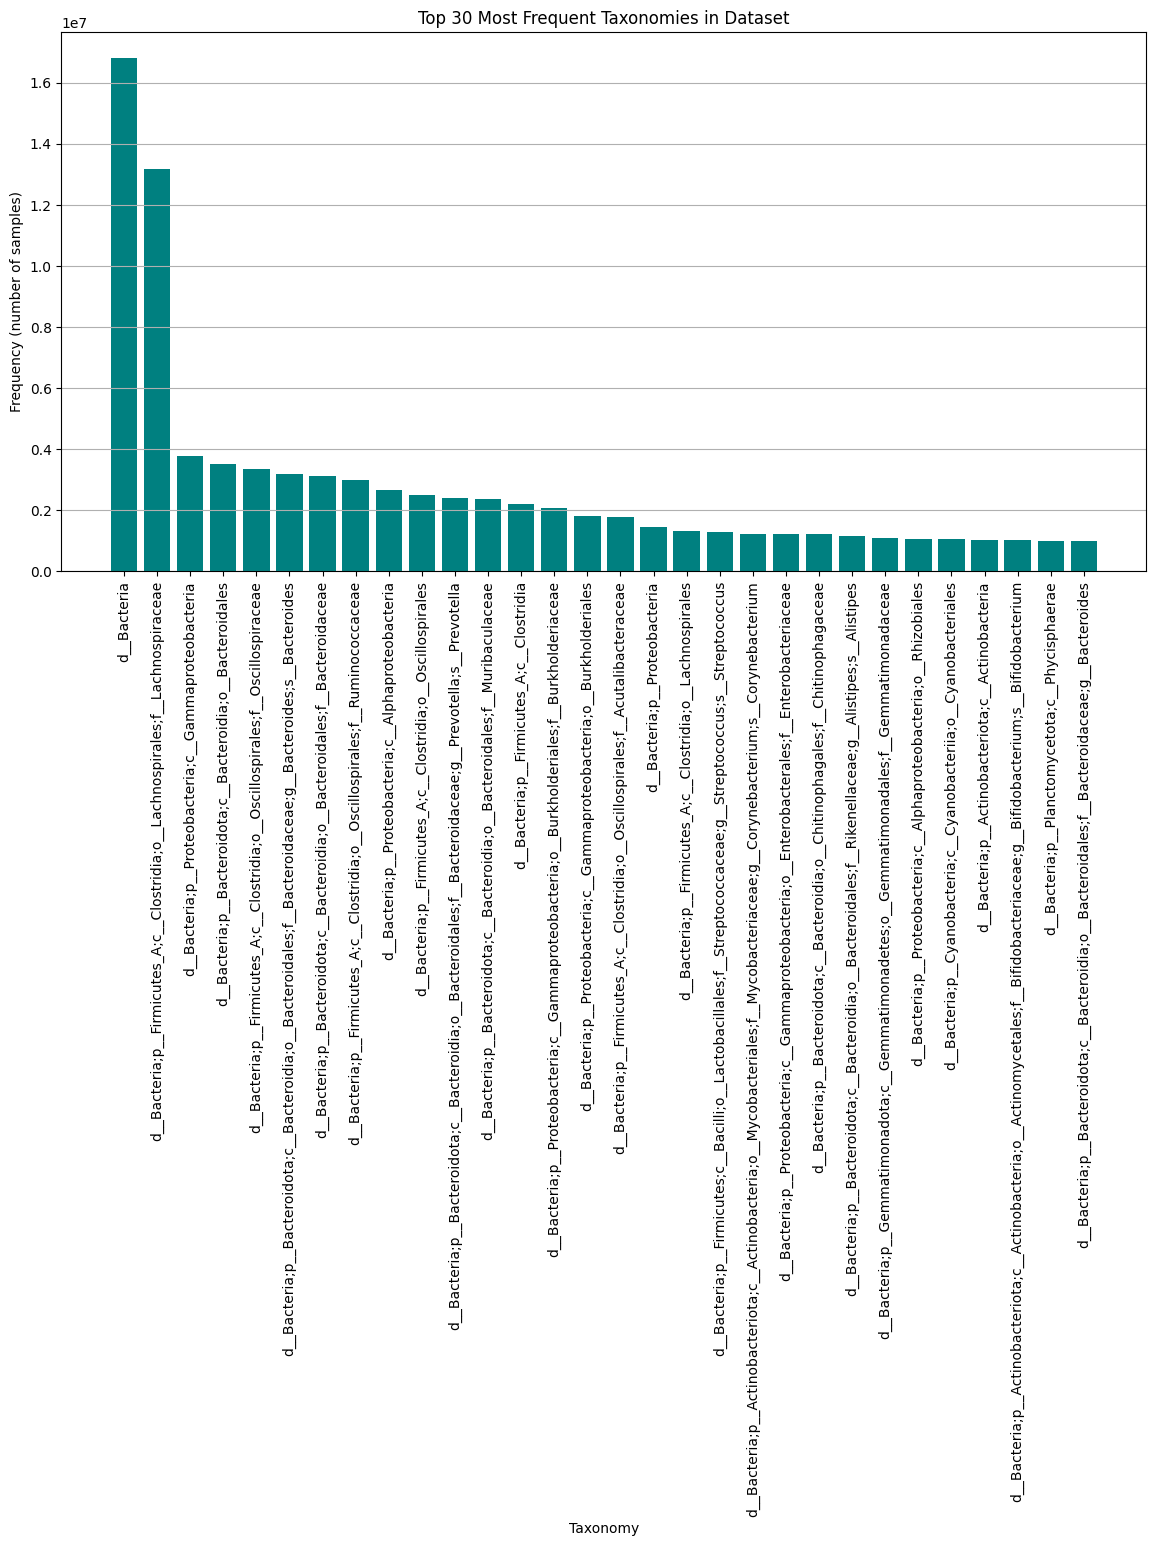

In [ ]:

# # Load OTU sequences matrix
# matrix_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/otus_sequences.json"
# with open(matrix_path, "r") as f:
#     otu_sequences = json.load(f)

# Load OTU metadata (with taxonomy info)
otu_info_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/processed_otus_info_97.csv"
df_otus = pd.read_csv(otu_info_path)

otu_to_taxonomy = dict(zip(df_otus["otu_id"], df_otus["taxonomy"]))

otu_counter = Counter()
for seq in sequence_matrix:
    for otu in seq:
        if otu != "<pad>":
            otu_counter[otu] += 1

taxonomy_counter = Counter()
for otu, count in otu_counter.items():
    tax = otu_to_taxonomy.get(otu, None)
    if tax:
        taxonomy_counter[tax] += count

# Select top N most common taxonomies
top_n = 30
top_tax = taxonomy_counter.most_common(top_n)
tax_labels, counts = zip(*top_tax)

# Plot
plt.figure(figsize=(14, 7))
plt.bar(range(len(tax_labels)), counts, color='teal')
plt.xticks(range(len(tax_labels)), tax_labels, rotation=90)
plt.title(f"Top {top_n} Most Frequent Taxonomies in Dataset")
plt.xlabel("Taxonomy")
plt.ylabel("Frequency (number of samples)")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

# Create  taxonomy_token_dictionary 97 OTUs

In [ ]:
import json
import pickle

In [ ]:
# Load OTU sequences
save_path_matrix = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/otus_sequences.json"
with open(save_path_matrix, "r") as f:
    sequence_matrix = json.load(f)


In [ ]:
# Define base token dictionary
taxonomy_token_dict = {
    "<pad>": 0,
    "<mask>": 1,
    "<cls>": 2,
    "<eos>": 3
}

# Collect unique OTUs (excluding those already in the special tokens)
unique_otus = set()
for sequence in sequence_matrix:
    for otu in sequence:
        if otu not in taxonomy_token_dict:
            unique_otus.add(otu)

# Sort for reproducibility (optional)
sorted_otus = sorted(unique_otus)

# Assign token IDs starting after special tokens
for i, otu in enumerate(sorted_otus, start=len(taxonomy_token_dict)):
    taxonomy_token_dict[otu] = i

# Save as pickle
save_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/taxonomy_token_dict.pkl"
with open(save_path, "wb") as f:
    pickle.dump(taxonomy_token_dict, f)

print(f"Token dictionary saved as pickle to:\n{save_path}")
print(f"Total tokens: {len(taxonomy_token_dict)}")

✅ Token dictionary saved as pickle to:
/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/level_97/taxonomy_token_dict.pkl
🔢 Total tokens: 98218
